In [1]:
%matplotlib inline
import numpy as np
import quantfin as qf
import matplotlib.pyplot as plt

In [2]:
# Generate random price data
N = 500
t = np.arange(N) # Time
P = qf.random_walk.mean_reversion(N, 0.0, 0.0, 0.005, sigma=0.1) # Prices

In [7]:
# Number of days to use for the 2 moving averages
n1 = 5
n2 = 30

# Compute moving averages
sma1 = qf.data.smoothing.sma(P, n1)
sma2 = qf.data.smoothing.sma(P, n2)

# Pad arrays so they're the same size
sma1_pad = np.pad(sma1, (n1, 0), 'edge')
sma2_pad = np.pad(sma2, (n2, 0), 'edge')

# Find intersection points
idx = np.argwhere(np.diff(np.sign(sma1_pad - sma2_pad))).flatten()
idx = idx[idx > n2] # Remove intersections in padded regions

# Intersections are often bunched together, remove intersections that
# are within 10 time ticks of each other (this is probably very badly written)
new_idx = idx.copy()
deleted = []
for i in range(len(idx)):
    a = idx[i]
    if i in deleted:
        continue
    for j in range(i + 1, len(idx)):
        b = idx[j]
        if abs(a - b) < 10:
            new_idx = np.delete(new_idx, np.where(new_idx == b))
            deleted.append(b)

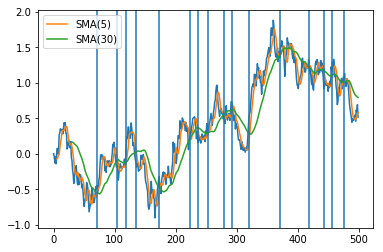

In [8]:
plt.plot(P)
fd, = plt.plot(t[n1:], sma1)
td, = plt.plot(t[n2:], sma2)
# Plot crossover points as horizontal lines
for i in new_idx:
    plt.axvline(t[i])
plt.legend([fd, td], ["SMA({})".format(n1), "SMA({})".format(n2)]);